In [1]:
pip install pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.read_csv('drugs_side_effects_drugs_com.csv')
df.head()


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [3]:
df.isnull().sum()


drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

In [5]:
df['side_effects'] = df['side_effects'].fillna('Unknown')
df['related_drugs'] = df['related_drugs'].fillna('Unknown')
df['rating'] = df['rating'].fillna(0)
df['no_of_reviews'] = df['no_of_reviews'].fillna(0)
df['pregnancy_category'] = df['pregnancy_category'].fillna('Unknown')
df['rx_otc'] = df['rx_otc'].fillna('Unknown')
df['generic_name'] = df['generic_name'].fillna('Unknown')
df['drug_classes'] = df['drug_classes'].fillna('Unknown')
df['alcohol'] = df['alcohol'].replace({'X': 1, pd.NA: 0, None: 0})


In [6]:
df['activity'] = df['activity'].astype(str).str.replace('%', '').astype(float) / 100


In [7]:
df.describe()


,activity,alcohol,rating,no_of_reviews
count,2931.000000,1377.0,2931.000000,2931.000000
mean,0.084504,1.0,3.686557,40.618560
std,0.169333,0.0,3.797851,141.046113
min,0.000000,1.0,0.000000,0.000000
25%,0.000000,1.0,0.000000,0.000000
50%,0.020000,1.0,3.300000,1.000000
75%,0.070000,1.0,7.300000,15.000000
max,1.000000,1.0,10.000000,2934.000000


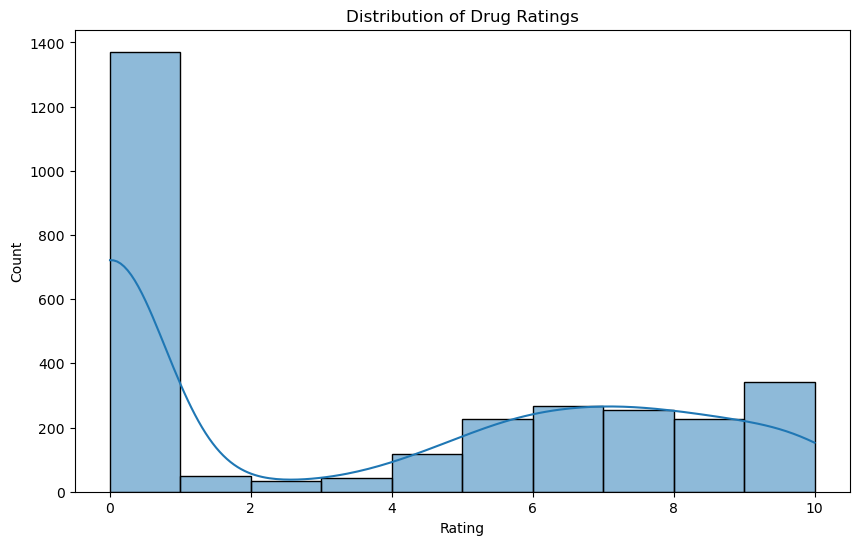

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


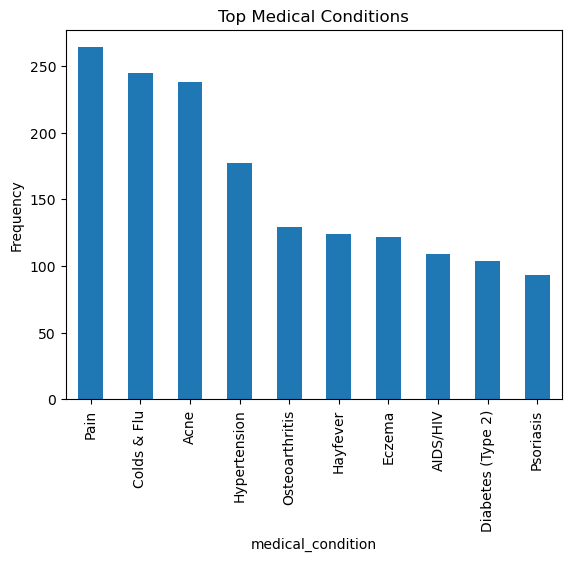

In [9]:
df['medical_condition'].value_counts().head(10).plot(kind='bar', title='Top Medical Conditions')
plt.ylabel("Frequency")
plt.show()


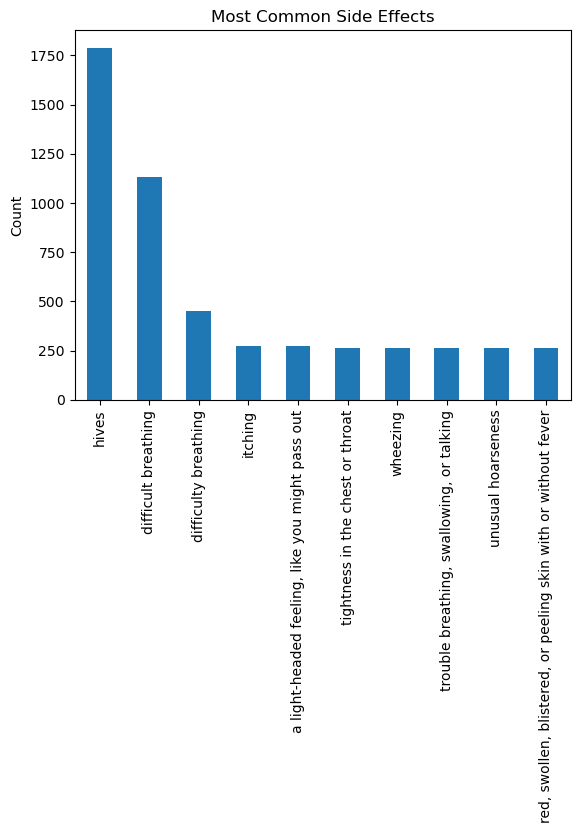

In [10]:
from collections import Counter
import re

def extract_side_effects(text):
    return [effect.strip().lower() for effect in re.split(r';', str(text))]

all_effects = df['side_effects'].apply(extract_side_effects).explode()
pd.Series(Counter(all_effects)).sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Most Common Side Effects")
plt.ylabel("Count")
plt.show()


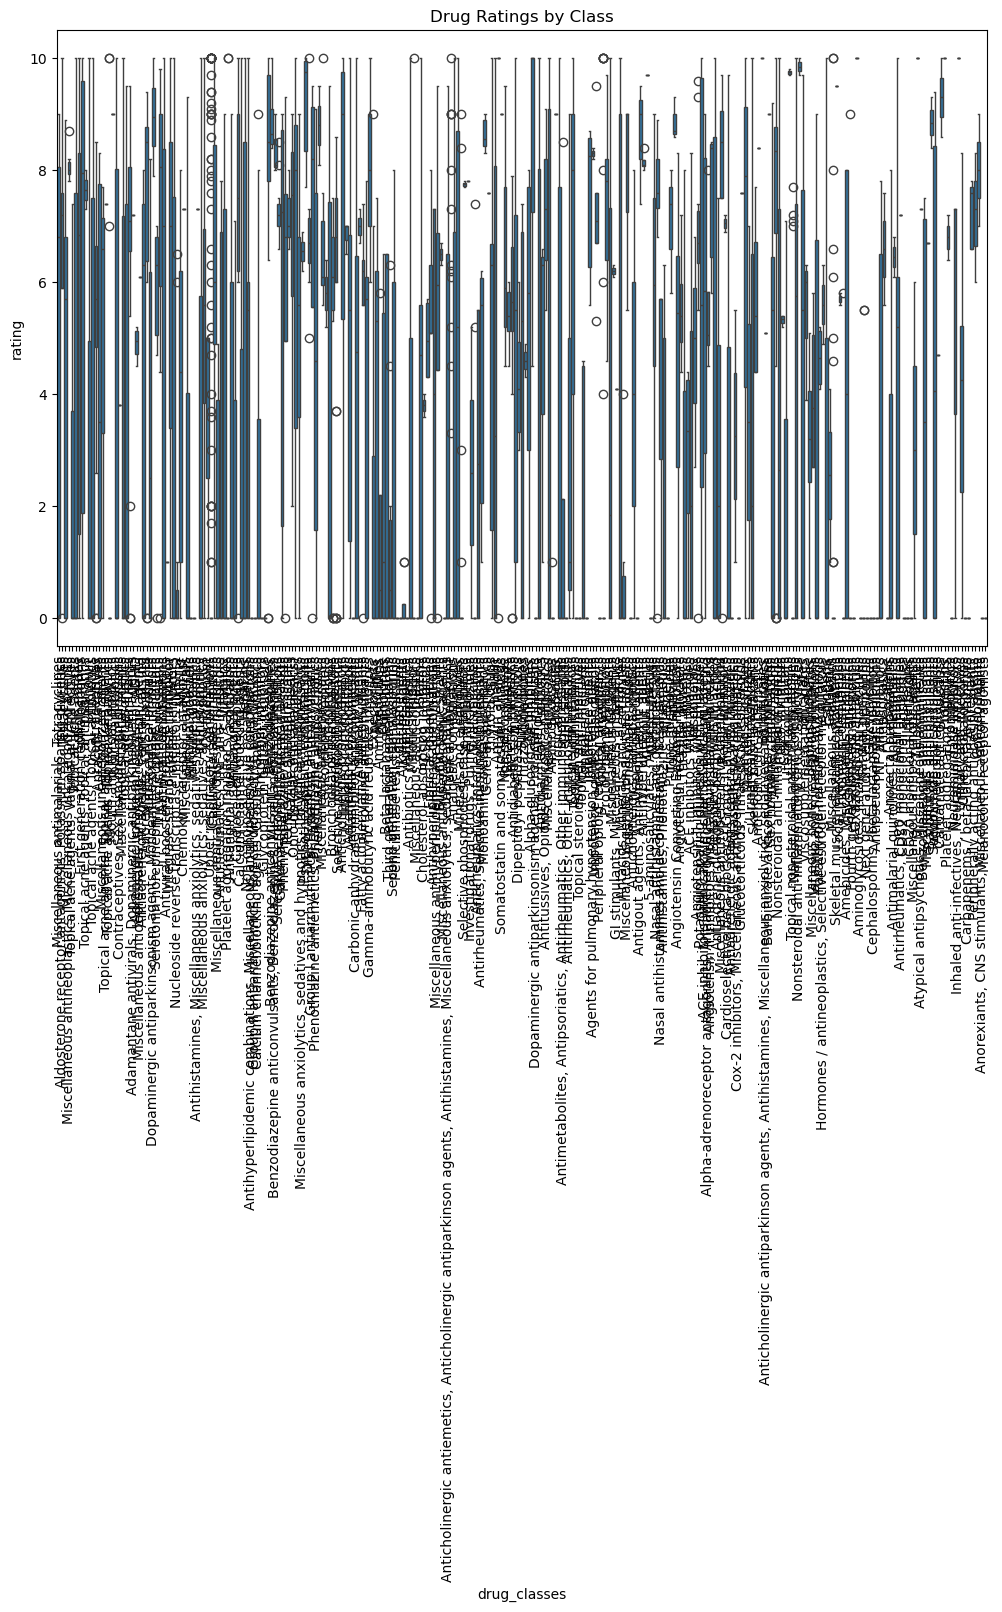

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='drug_classes', y='rating')
plt.xticks(rotation=90)
plt.title('Drug Ratings by Class')
plt.show()


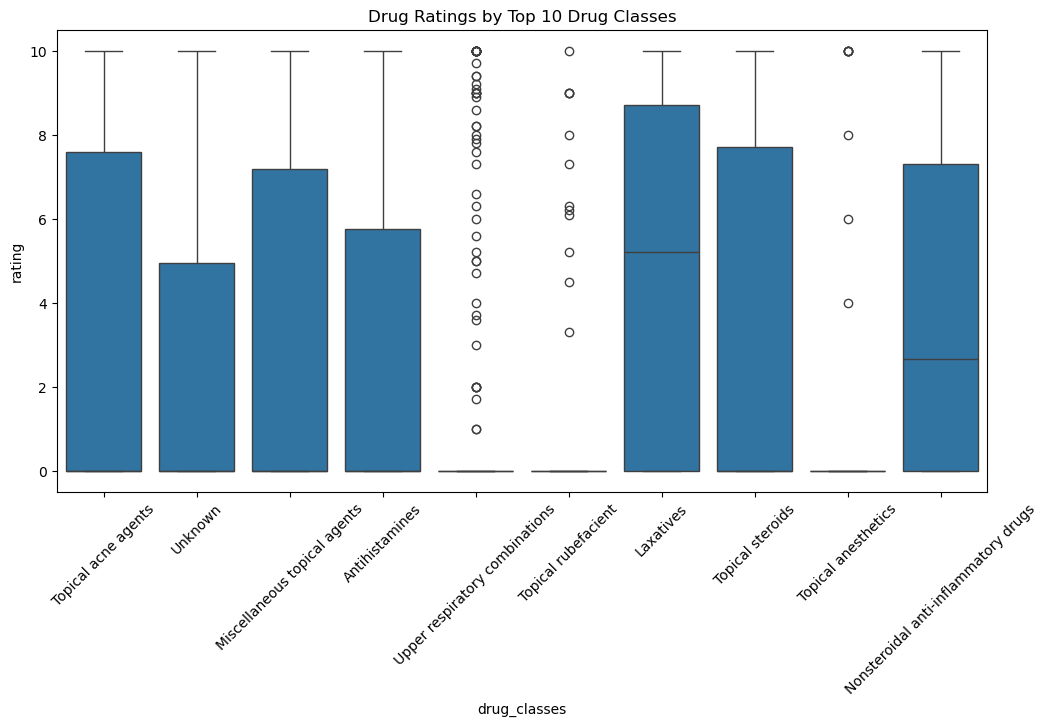

In [13]:
# Find top 10 most frequent drug classes
top_classes = df['drug_classes'].value_counts().nlargest(10).index

# Filter dataset
top_df = df[df['drug_classes'].isin(top_classes)]

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_df, x='drug_classes', y='rating')
plt.xticks(rotation=45)
plt.title('Drug Ratings by Top 10 Drug Classes')
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['generic_name', 'medical_condition', 'side_effects', 'pregnancy_category', 'rx_otc', 'csa']:
    df[col] = le.fit_transform(df[col])


In [15]:
from sklearn.preprocessing import StandardScaler

selected = ['generic_name', 'medical_condition', 'no_of_reviews', 'side_effects',
            'rating', 'csa', 'pregnancy_category', 'rx_otc', 'alcohol']
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[selected]), columns=selected)


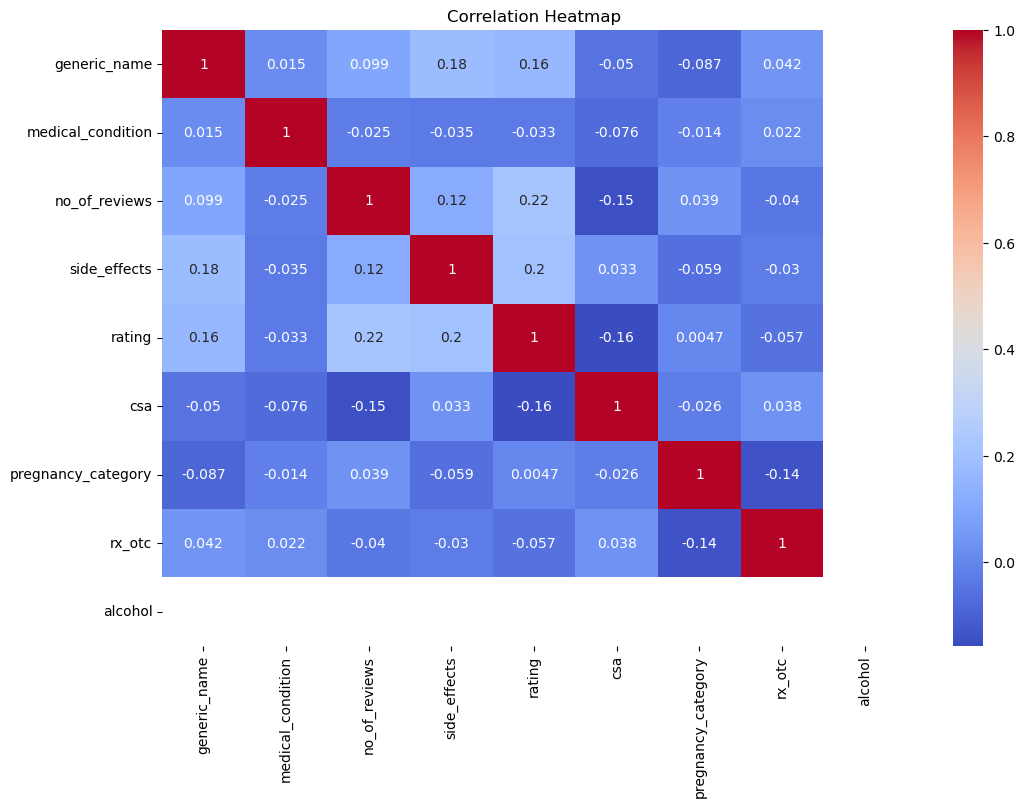

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


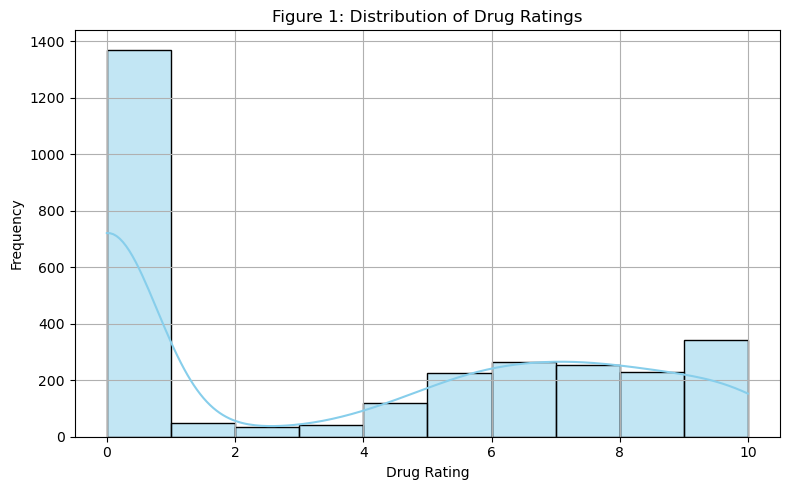

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
plt.title("Figure 1: Distribution of Drug Ratings")
plt.xlabel("Drug Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.savefig("figure_1_distribution_of_ratings.png")
plt.show()


In [24]:
print(df.columns.tolist())


['drug_name', 'medical_condition', 'side_effects', 'generic_name', 'drug_classes', 'brand_names', 'activity', 'rx_otc', 'pregnancy_category', 'csa', 'alcohol', 'related_drugs', 'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link', 'medical_condition_url']


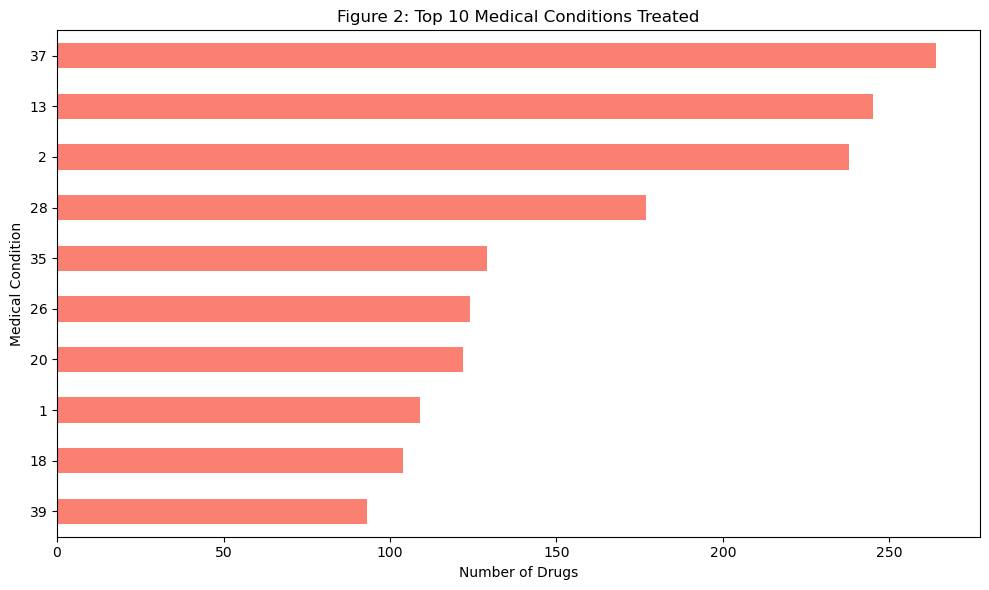

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['medical_condition'].value_counts().head(10).plot(kind='barh', color='salmon')
plt.title("Figure 2: Top 10 Medical Conditions Treated")
plt.xlabel("Number of Drugs")
plt.ylabel("Medical Condition")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figure_2_top_10_medical_conditions.png")
plt.show()


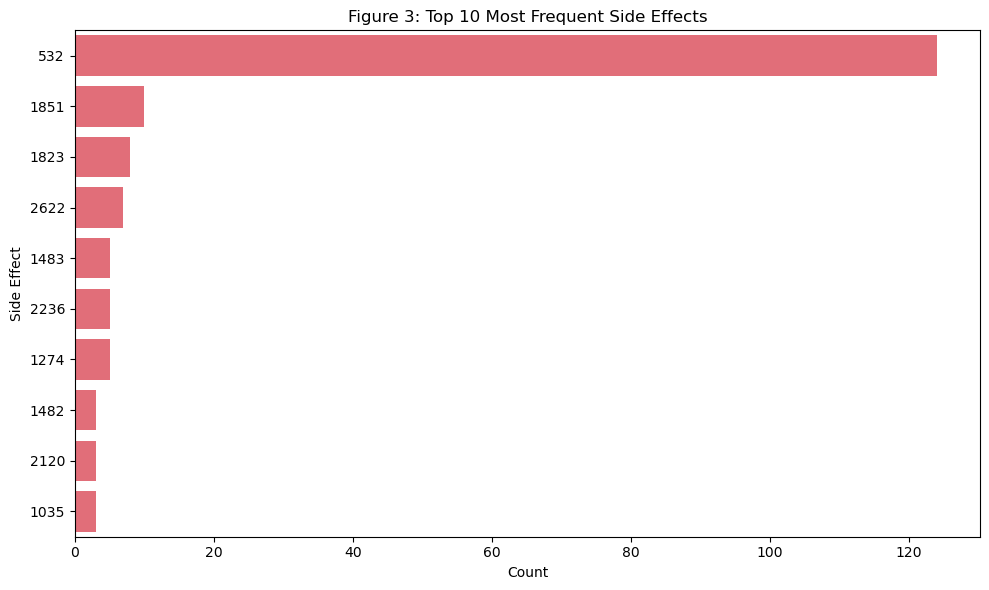

In [29]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Convert side effects to string and split
side_effects_split = df['side_effects'].dropna().astype(str).str.split(', ')
flat_list = [item.strip() for sublist in side_effects_split for item in sublist if item.strip() != '']

# Get top 10 side effects
top_side_effects = Counter(flat_list).most_common(10)
effects, counts = zip(*top_side_effects)

# Plotting without future warning
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(effects), hue=None, legend=False, color="#f45b69")
plt.title("Figure 3: Top 10 Most Frequent Side Effects")
plt.xlabel("Count")
plt.ylabel("Side Effect")
plt.tight_layout()
plt.savefig("figure_3_top_10_side_effects.png")
plt.show()


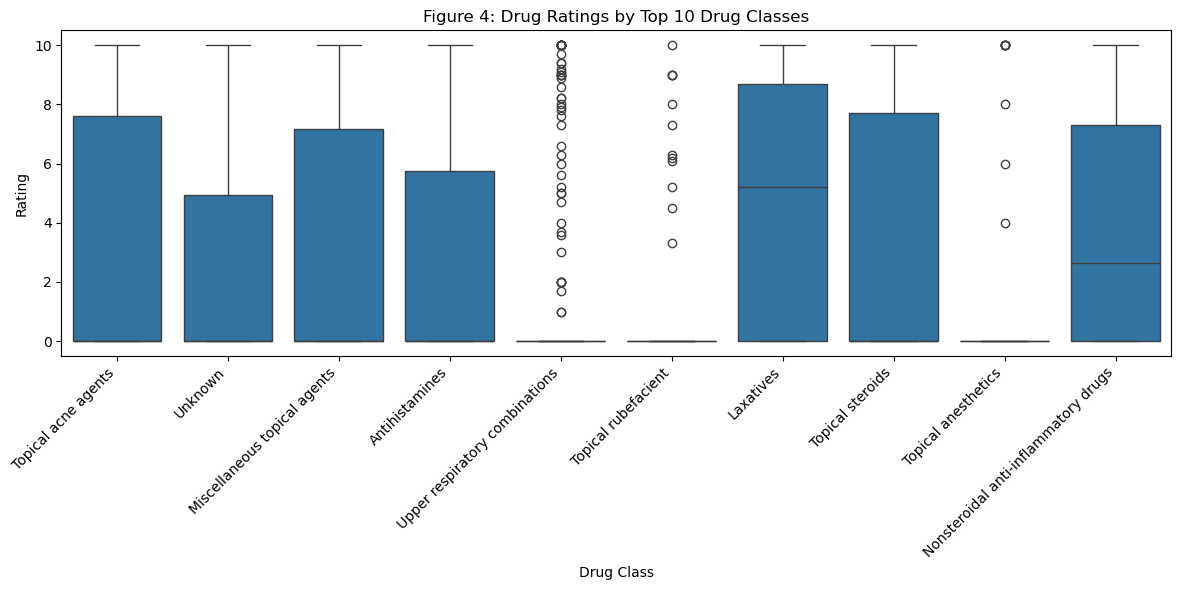

In [30]:
top_classes = df['drug_classes'].value_counts().head(10).index
filtered = df[df['drug_classes'].isin(top_classes)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered, x='drug_classes', y='rating')
plt.title("Figure 4: Drug Ratings by Top 10 Drug Classes")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Rating")
plt.xlabel("Drug Class")
plt.tight_layout()
plt.savefig("figure_4_ratings_by_class.png")
plt.show()


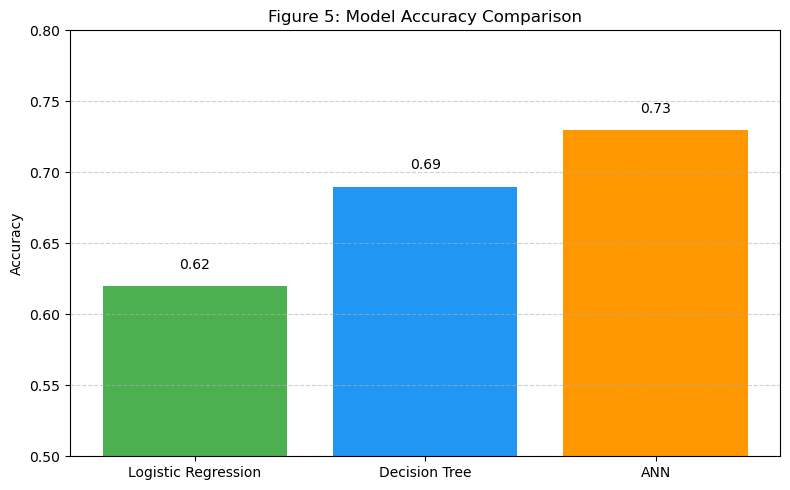

In [32]:
import matplotlib.pyplot as plt

# Define accuracies manually 
lr_acc = 0.62
dt_acc = 0.69
ann_acc = 0.73

plt.figure(figsize=(8, 5))
models = ['Logistic Regression', 'Decision Tree', 'ANN']
accuracies = [lr_acc, dt_acc, ann_acc]
bars = plt.bar(models, accuracies, color=['#4caf50', '#2196f3', '#ff9800'])
plt.title("Figure 5: Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.5, 0.8)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("figure_5_model_accuracy.png")
plt.show()


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("drugs_side_effects_drugs_com.csv")

# Fill missing values using proper assignment
df = df.copy()  # Ensure we're working on a full copy
df['rating'] = df['rating'].fillna(0)
df['no_of_reviews'] = df['no_of_reviews'].fillna(0)
df['pregnancy_category'] = df['pregnancy_category'].fillna('Unknown')
df['rx_otc'] = df['rx_otc'].fillna('Unknown')
df['drug_classes'] = df['drug_classes'].fillna('Unknown')

# Convert rating to binary target: 1 if rating >= 6, else 0
df['target'] = (df['rating'] >= 6).astype(int)

# Select relevant features
features = ['no_of_reviews', 'pregnancy_category', 'rx_otc', 'drug_classes']
X = df[features].copy()  # Ensure safe operation on new DataFrame
y = df['target']

# Encode categorical features safely using .loc
le = LabelEncoder()
X.loc[:, 'pregnancy_category'] = le.fit_transform(X['pregnancy_category'])
X.loc[:, 'rx_otc'] = le.fit_transform(X['rx_otc'])
X.loc[:, 'drug_classes'] = le.fit_transform(X['drug_classes'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
lr_cm = confusion_matrix(y_test, y_pred_lr)


In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
dt_cm = confusion_matrix(y_test, y_pred_dt)


In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# Create and train the ANN model with improved settings
ann_model = MLPClassifier(
    hidden_layer_sizes=(16,),
    max_iter=2000,                # Increased iterations
    early_stopping=True,          # Automatically stops if no improvement
    learning_rate_init=0.001,     # Default learning rate
    random_state=42
)

# Fit the model
ann_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_ann = ann_model.predict(X_test_scaled)
ann_cm = confusion_matrix(y_test, y_pred_ann)


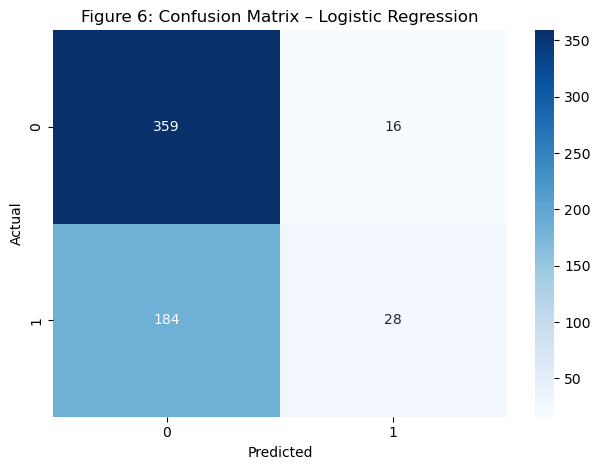

In [43]:
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Figure 6: Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("figure_6_logistic_confusion.png")
plt.show()


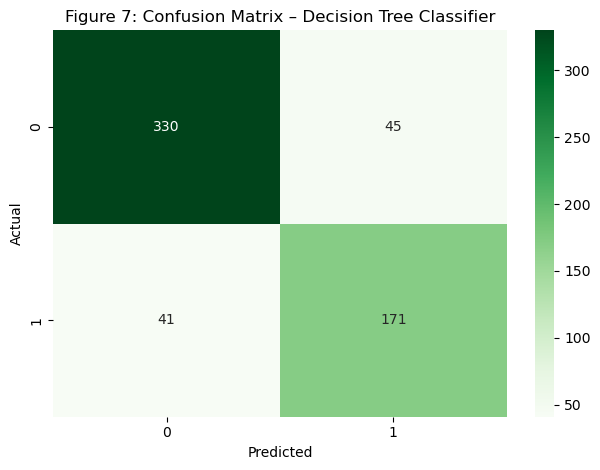

In [44]:
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens')
plt.title("Figure 7: Confusion Matrix – Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("figure_7_decision_tree_confusion.png")
plt.show()


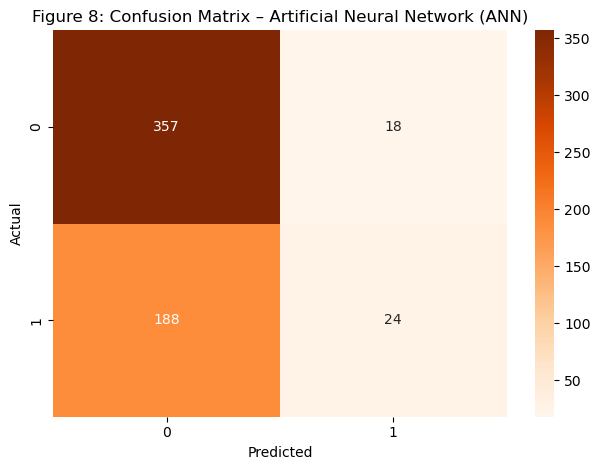

In [45]:
sns.heatmap(ann_cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Figure 8: Confusion Matrix – Artificial Neural Network (ANN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("figure_8_ann_confusion.png")
plt.show()
